In [1]:
import sys, os
import numpy as np
import time, h5py
codepath = '/user_data/mmhender/imStat/code'
sys.path.append(codepath)
from utils import default_paths, nsd_utils, coco_utils
from model_fitting import initialize_fitting 
import argparse
import pandas as pd
import matplotlib

Initializing coco api...
loading annotations into memory...
Done (t=0.58s)
creating index...
index created!
loading annotations into memory...
Done (t=15.96s)
creating index...
index created!
Initializing coco api...
loading annotations into memory...
Done (t=0.45s)
creating index...
index created!
loading annotations into memory...
Done (t=20.88s)
creating index...
index created!


In [9]:
cat_objects, cat_names, cat_ids, supcat_names, ids_each_supcat = \
        coco_utils.get_coco_cat_info(coco_utils.coco_val)


In [18]:
stuff_cat_objects, stuff_cat_names, stuff_cat_ids, stuff_supcat_names, stuff_ids_each_supcat = \
            coco_utils.get_coco_cat_info(coco_utils.coco_stuff_val)


In [19]:
stuff_cat_names

['banner',
 'blanket',
 'branch',
 'bridge',
 'building-other',
 'bush',
 'cabinet',
 'cage',
 'cardboard',
 'carpet',
 'ceiling-other',
 'ceiling-tile',
 'cloth',
 'clothes',
 'clouds',
 'counter',
 'cupboard',
 'curtain',
 'desk-stuff',
 'dirt',
 'door-stuff',
 'fence',
 'floor-marble',
 'floor-other',
 'floor-stone',
 'floor-tile',
 'floor-wood',
 'flower',
 'fog',
 'food-other',
 'fruit',
 'furniture-other',
 'grass',
 'gravel',
 'ground-other',
 'hill',
 'house',
 'leaves',
 'light',
 'mat',
 'metal',
 'mirror-stuff',
 'moss',
 'mountain',
 'mud',
 'napkin',
 'net',
 'paper',
 'pavement',
 'pillow',
 'plant-other',
 'plastic',
 'platform',
 'playingfield',
 'railing',
 'railroad',
 'river',
 'road',
 'rock',
 'roof',
 'rug',
 'salad',
 'sand',
 'sea',
 'shelf',
 'sky-other',
 'skyscraper',
 'snow',
 'solid-other',
 'stairs',
 'stone',
 'straw',
 'structural-other',
 'table',
 'tent',
 'textile-other',
 'towel',
 'tree',
 'vegetable',
 'wall-brick',
 'wall-concrete',
 'wall-other',

In [2]:
subject=1
which_prf_grid=5;
prf_model_index=600;


number of pRFs: 1456
most extreme RF positions:
[2.7755576e-17 0.0000000e+00 2.0000000e-02]
[ 0.7698996  -0.31890285  1.        ]


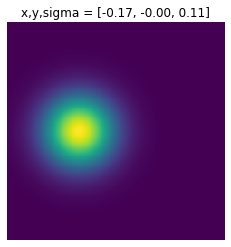

In [3]:
import matplotlib.pyplot as plt
from utils import prf_utils
which_prf_grid=5
models = initialize_fitting.get_prf_models(which_grid=which_prf_grid)
n_prfs = len(models)
mm = prf_model_index

x,y,sigma = models[mm,:]
n_pix = 240
prf_2d = prf_utils.gauss_2d(center=[x,y], sd=sigma, patch_size=n_pix)

plt.figure();
plt.pcolormesh(prf_2d)
plt.axis('off')
plt.axis('square')
plt.gca().invert_yaxis()
plt.title('x,y,sigma = [%.2f, %.2f, %.2f]'%(x,y,sigma));

In [4]:
ims2use = np.arange(0,10000)
image_data = nsd_utils.get_image_data(subject)
image_data = nsd_utils.image_uncolorize_fn(image_data)
image_data = image_data[ims2use,:,:,:]
n_images = image_data.shape[0]


Loading images for subject 1

image data size: (10000, 3, 240, 240) , dtype: uint8 , value range: 0 255


In [5]:
labels_folder = os.path.join(default_paths.stim_labels_root, 'S%d_within_prf_grid%d'%(subject, \
                                                                                        which_prf_grid))

fn2load = os.path.join(labels_folder, 'S%d_realworldsize_prf%d.csv'%(subject, prf_model_index))
size_df = pd.read_csv(fn2load, index_col=0)
rws = np.array(size_df)

fn2load = os.path.join(labels_folder, 'S%d_cocolabs_binary_prf%d.csv'%(subject, prf_model_index))
coco_df = pd.read_csv(fn2load, index_col=0)
cat_labels = np.array(coco_df)[:,12:92]




image 0 has:
['sandwich']

image 1 has:
['cat', 'umbrella']

image 2 has:
['bird']

image 3 has:
['clock']


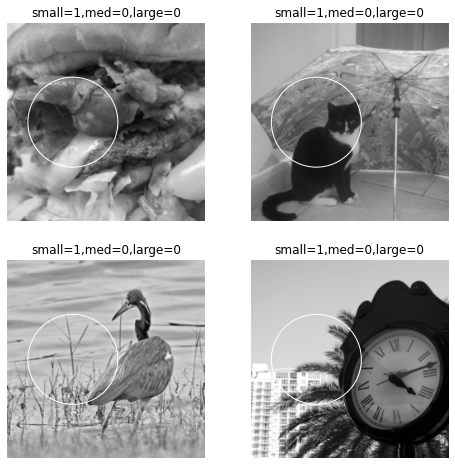

In [21]:
# plot examples - "small" objects

ims2use = np.where((rws[:,0]==1) & (rws[:,1]==0) & (rws[:,2]==0))[0]

images2plot = np.random.choice(ims2use,4);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(2,2,ii+1);
    plt.imshow(image_data[im,0,:,:],cmap='gray', clim=[0,1])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('small=%d,med=%d,large=%d'%(rws[im,0], rws[im,1], rws[im,2]))
    print('\nimage %d has:'%ii)
    print([cat_names[cc] for cc in range(len(cat_names)) if cat_labels[im,cc]==1])
   


image 0 has:
['person']

image 1 has:
['person', 'skis']

image 2 has:
['person', 'surfboard']

image 3 has:
['sheep']


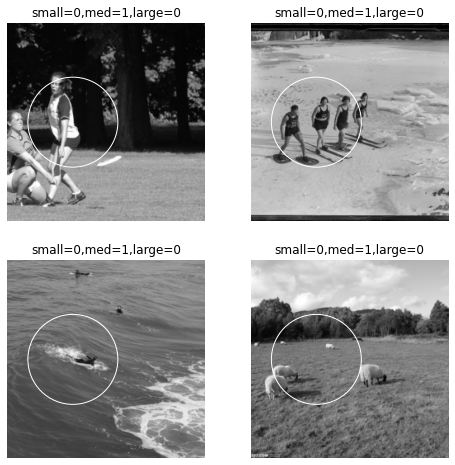

In [14]:
# plot examples - "medium" objects

ims2use = np.where((rws[:,0]==0) & (rws[:,1]==1) & (rws[:,2]==0))[0]

images2plot = np.random.choice(ims2use,4);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(2,2,ii+1);
    plt.imshow(image_data[im,0,:,:],cmap='gray', clim=[0,1])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('small=%d,med=%d,large=%d'%(rws[im,0], rws[im,1], rws[im,2]))
    print('\nimage %d has:'%ii)
    print([cat_names[cc] for cc in range(len(cat_names)) if cat_labels[im,cc]==1])
   


image 0 has:
['train']

image 1 has:
['zebra']

image 2 has:
['airplane']

image 3 has:
['elephant']


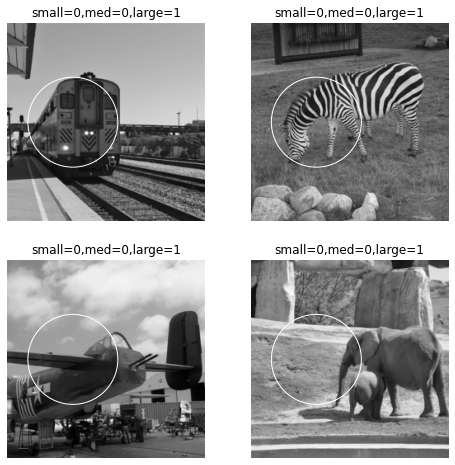

In [16]:
# plot examples - "large" objects

ims2use = np.where((rws[:,0]==0) & (rws[:,1]==0) & (rws[:,2]==1))[0]

images2plot = np.random.choice(ims2use,4);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(2,2,ii+1);
    plt.imshow(image_data[im,0,:,:],cmap='gray', clim=[0,1])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('small=%d,med=%d,large=%d'%(rws[im,0], rws[im,1], rws[im,2]))
    print('\nimage %d has:'%ii)
    print([cat_names[cc] for cc in range(len(cat_names)) if cat_labels[im,cc]==1])
   


image 0 has:
['person', 'bicycle', 'car', 'truck', 'traffic light', 'backpack']

image 1 has:
['bottle', 'sink', 'refrigerator']

image 2 has:
['person', 'bicycle', 'horse', 'umbrella']

image 3 has:
['person', 'chair', 'cell phone']


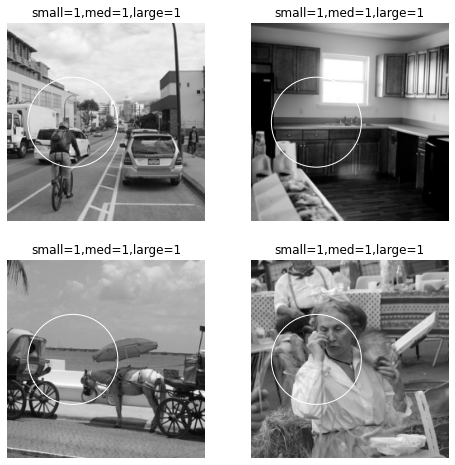

In [17]:
# plot examples - all sizes of objects

ims2use = np.where((rws[:,0]==1) & (rws[:,1]==1) & (rws[:,2]==1))[0]

images2plot = np.random.choice(ims2use,4);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(2,2,ii+1);
    plt.imshow(image_data[im,0,:,:],cmap='gray', clim=[0,1])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('small=%d,med=%d,large=%d'%(rws[im,0], rws[im,1], rws[im,2]))
    print('\nimage %d has:'%ii)
    print([cat_names[cc] for cc in range(len(cat_names)) if cat_labels[im,cc]==1])
   